_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Financial Times Visual Vocabulary poster](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.9.0)


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-01-22 18:17:45--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-01-22 18:17:46 (119 MB/s) - ‘misleading.py.1’ saved [1258/1258]



### Fix misleading plot #1

Plot market share for auto insurance in the US

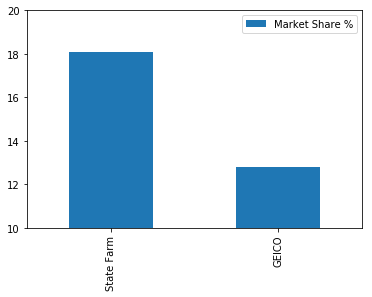

In [6]:
misleading.plot1();

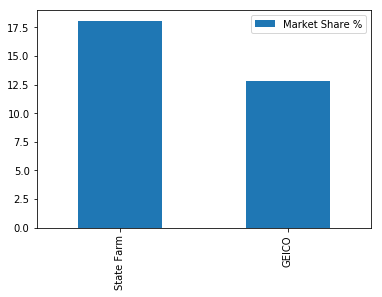

In [7]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})


insurance.plot.bar();

In [8]:
18.07 / 12.79

1.4128225175918687

In [9]:
(18.07 - 10) / (12.79 - 10)

2.892473118279571

### Fix misleading plot #2

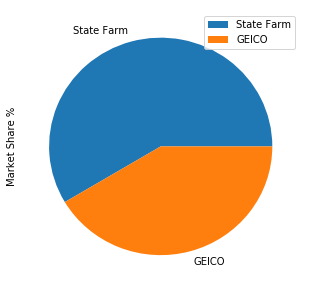

In [10]:
misleading.plot2();

In [11]:
insurance

,Market Share %
State Farm,18.07
GEICO,12.79


In [12]:
insurance.loc['Other'] = 100 - insurance.sum()

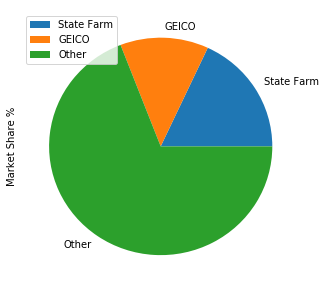

In [13]:
insurance.plot.pie('Market Share %', figsize=(5, 5));

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [14]:
!pip install altair vega_datasets 

    100% |████████████████████████████████| 399kB 336kB/s 
    100% |████████████████████████████████| 215kB 1.3MB/s 


In [15]:
import altair as alt
from vega_datasets import data

# In JupyterLab this line is unnecessary
#alt.renderers.enable('notebook')

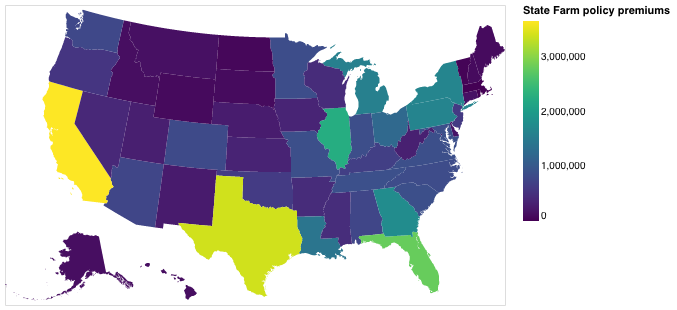

In [16]:
misleading.plot3()

#### Load the State Farm data

In [17]:
# Based on https://altair-viz.github.io/gallery/choropleth_repeat.html
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'

In [18]:
df = pd.read_csv(url)

df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
variable = 'State Farm policy premiums'

#### Calculate market share percentage by state

In [19]:
# df['State Farm policy premiums'] = revenue per state
# df['STATE TOTAL'] = population of each state

df['State Farm market share %'] = (
    df['State Farm policy premiums'] / 
    df['STATE TOTAL'])

#### And then map `State Farm market share %` instead of `State Farm policy premiums`

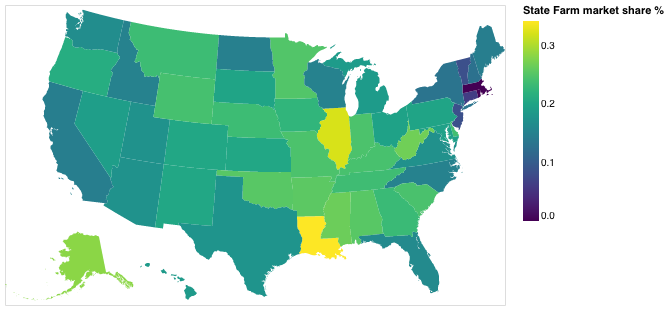

In [20]:
variable = 'State Farm market share %'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [21]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [22]:
df.shape

(44, 3)

### See the data

In [23]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [24]:
df_group = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [25]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [26]:
df_group.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [27]:
df.describe().loc['mean']

x    9.000000
y    7.500682
Name: mean, dtype: float64

### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [28]:
df.describe().loc['std']

x    3.198837
y    1.958925
Name: std, dtype: float64

### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [29]:
df.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

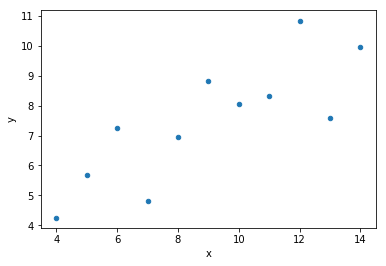

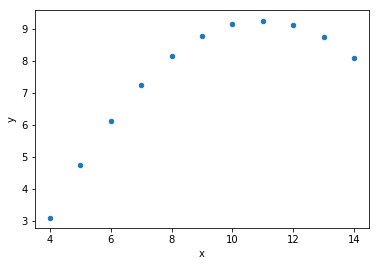

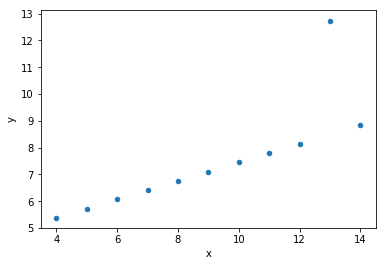

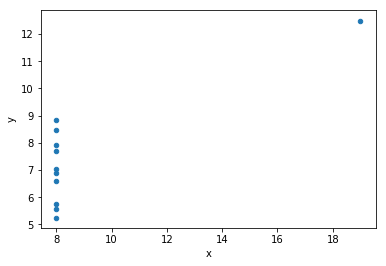

In [47]:
df_group.plot('x', 'y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

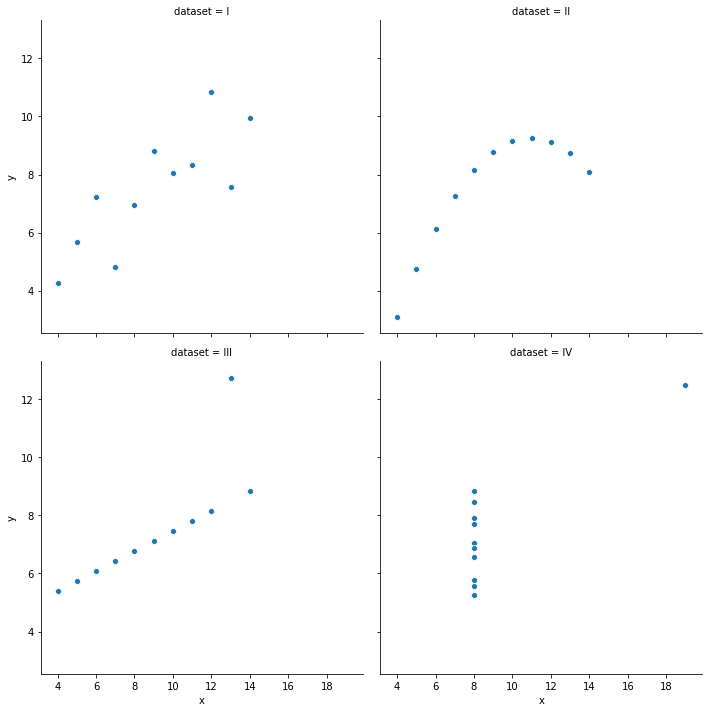

In [31]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

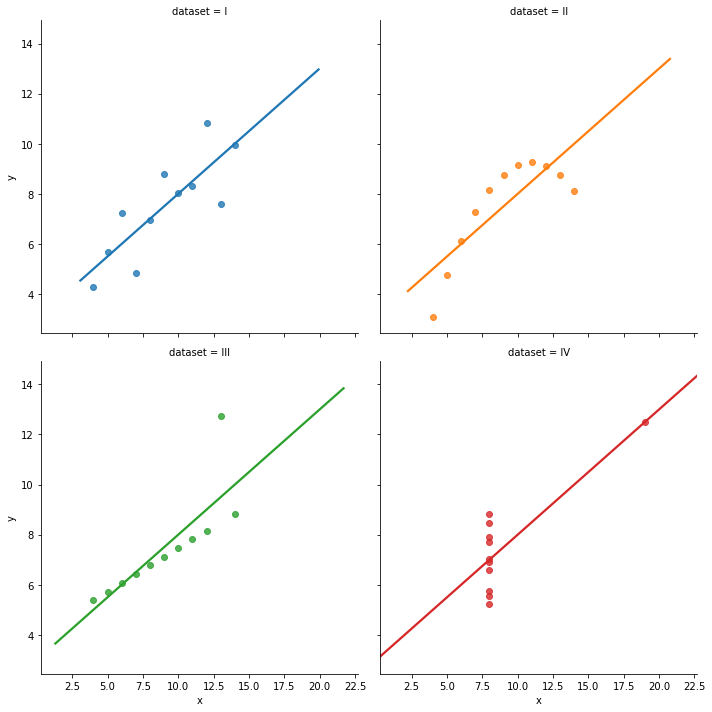

In [48]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', col_wrap=2, ci=None, data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [37]:
tips = sns.load_dataset('tips')

### See the data's shape

In [38]:
tips.shape

(244, 7)

### See the first 5 rows

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [40]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [41]:
tips.describe(exclude=np.number)

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

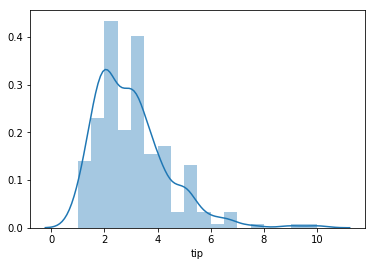

In [49]:
sns.distplot(tips.tip)

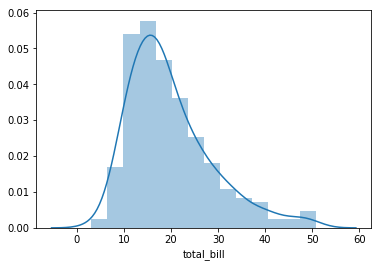

In [51]:
sns.distplot(tips.total_bill)

In [52]:
tips['percent'] = tips.tip/tips.total_bill

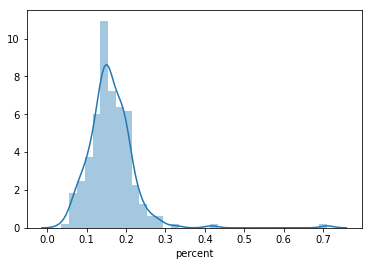

In [53]:
sns.distplot(tips.percent)

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

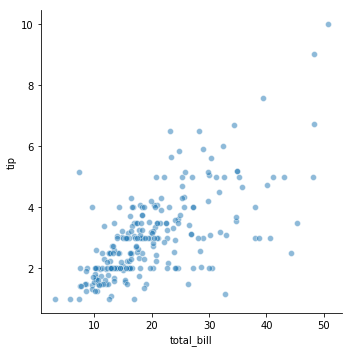

In [54]:
sns.relplot(x='total_bill', y='tip', data=tips, alpha=0.5)

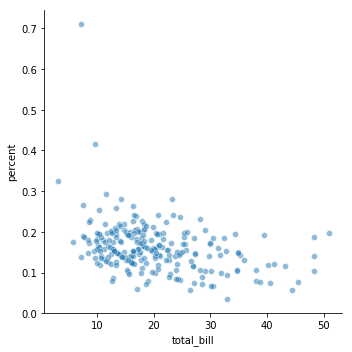

In [55]:
sns.relplot(x='total_bill', y='percent', data=tips, alpha=0.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [59]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

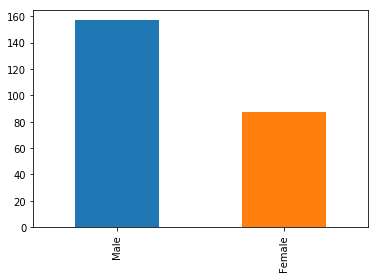

In [60]:
tips.sex.value_counts().plot.bar();

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

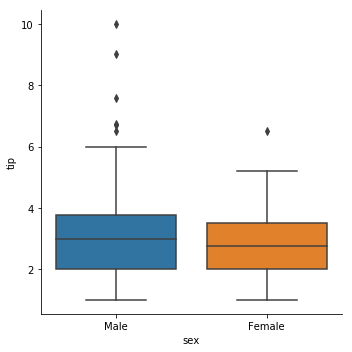

In [42]:
sns.catplot(x='sex', y='tip', data=tips, kind='box')

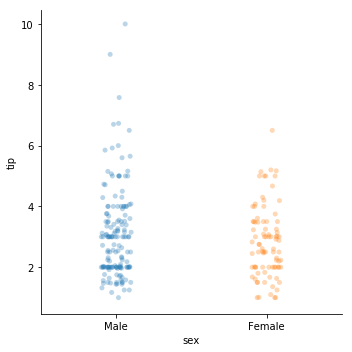

In [126]:
sns.catplot(x='sex', y='tip', data=tips, kind='strip', alpha=0.3);

## 3. Flights

### Load dataset

In [61]:
flights = sns.load_dataset('flights')

### See the data's shape

In [62]:
flights.shape

(144, 3)

### See the first 5 rows

In [64]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [65]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [66]:
flights.describe(exclude=np.number)

,month
count,144
unique,12
top,December
freq,12


### Plot year & passengers

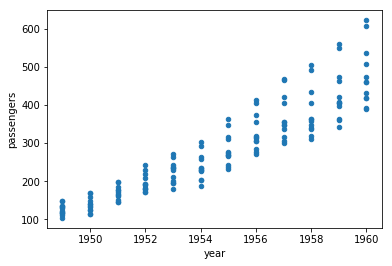

In [129]:
flights.plot.scatter(x='year', y='passengers')

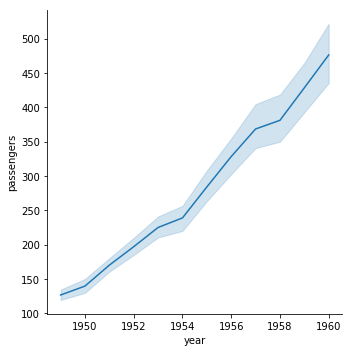

In [128]:
sns.relplot(x='year', y='passengers', data=flights, kind='line', ci=95)

### Plot month & passengers

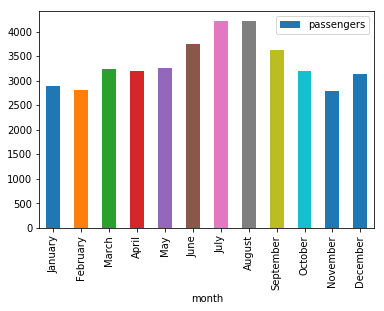

In [97]:
flights[['month', 'passengers']].groupby('month').agg('sum').reset_index().plot(x='month', y='passengers', kind='bar')

In [357]:
factorized_flights = pd.DataFrame({'month': pd.Series(flights['month'].factorize()[0]), 'passengers': flights['passengers']})

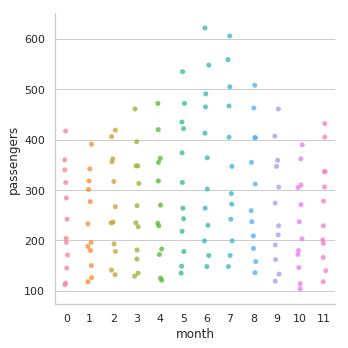

In [325]:
sns.catplot(x='month', y='passengers', data=factorized_flights, kind='strip', alpha=0.8);

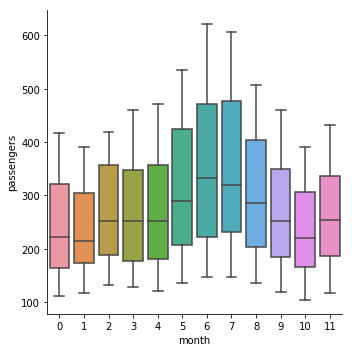

In [156]:
sns.catplot(x='month', y='passengers', data=factorized_flights, kind='box')

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [102]:
pivoted_flights = flights.pivot(
    values='passengers',
    columns='year',
    index='month'
)

In [106]:
pivoted_flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

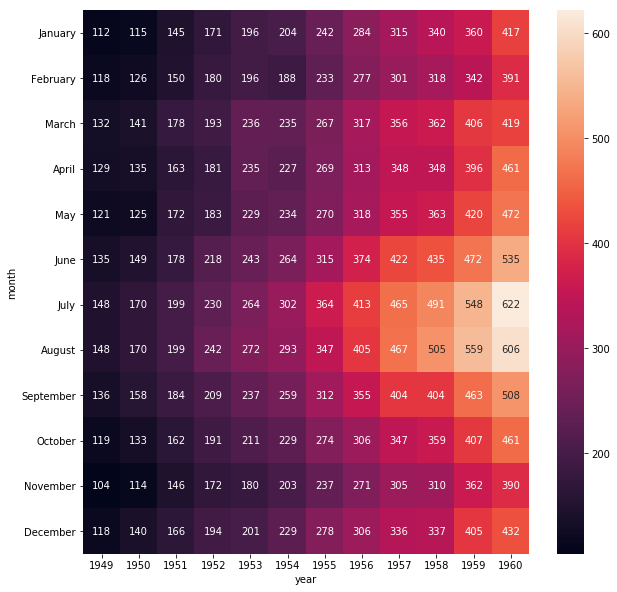

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pivoted_flights, annot=True, fmt='d', ax=ax)

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) Experiment and make changes.

Take notes. Share your work with your cohort!


In [ ]:
!pip install plotly

In [555]:
import altair as alt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from bokeh.palettes import inferno
from bokeh.plotting import figure, output_file
from bokeh.io import push_notebook, show, output_notebook

In [492]:
output_notebook()

Loading BokehJS ...

In [286]:
plotly.tools.set_credentials_file(username='colejhudson', api_key='qFqMppEA5iyniB5jn5bj')

In [358]:
factorized_flights['year'] = flights['year']
factorized_flights.head()

,month,passengers,year
0,0,112,1949
1,1,118,1949
2,2,132,1949
3,3,129,1949
4,4,121,1949


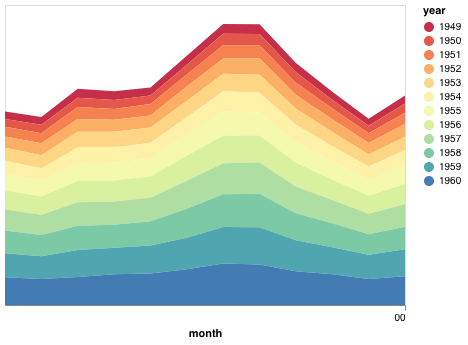

In [271]:
alt.Chart(factorized_flights).mark_area(
    color='red',
).encode(
    alt.X('month:T', axis=alt.Axis(format='%M')),
    alt.Y('sum(passengers):Q', axis=None),
    alt.Color('year:N', scale=alt.Scale(scheme='spectral'))
)

In [296]:
x = factorized_flights['year']
y = factorized_flights['passengers']

colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]

fig = ff.create_2d_density(
    x, 
    y, 
    colorscale=colorscale,
    hist_color='rgb(255, 237, 222)', 
    point_size=5
)

py.iplot(fig, filename='histogram_subplots')

/opt/conda/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [297]:
x = factorized_flights['month']
y = factorized_flights['passengers']

colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]

fig = ff.create_2d_density(
    x, 
    y, 
    colorscale=colorscale,
    hist_color='rgb(255, 237, 222)', 
    point_size=5
)

py.iplot(fig, filename='histogram_subplots')

/opt/conda/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



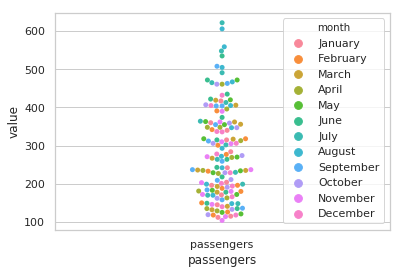

In [316]:
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = flights[['month', 'passengers']]

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "month", var_name="passengers")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(
    x="passengers", 
    y="value", 
    hue="month",
    data=iris
)

In [405]:
factorized_flights = pd.DataFrame(
    {'month': pd.Series(flights['month'].factorize()[0]), 'passengers': flights['passengers']}
)
factorized_flights['year'] = flights['year']
factorized_flights.head()

,month,passengers,year
0,0,112,1949
1,1,118,1949
2,2,132,1949
3,3,129,1949
4,4,121,1949


In [470]:
df = factorized_flights

In [471]:
df.head()

,month,passengers,year
0,0,112,1949
1,1,118,1949
2,2,132,1949
3,3,129,1949
4,4,121,1949


In [472]:
ndf = df.pivot(
    index='year',
    columns='month',
    values='passengers'
).reset_index()

del ndf.index.name

In [511]:
ndf['open'] = ndf[0]
ndf['high'] = ndf[list(range(0,12))].apply(lambda x: max(x), axis=1)
ndf['low'] = ndf[list(range(0,12))].apply(lambda x: min(x), axis=1)
ndf['close'] = ndf[11]
ndf['mids'] = (ndf.open + ndf.close)/2
ndf['spans'] = abs(ndf.close-ndf.open)
ndf['inc'] = ndf.close > ndf.open
ndf['dec'] = ndf.open > ndf.close
ndf['year'] = pd.to_datetime(ndf['year'].astype(str))

In [512]:
customer_volume = ndf
customer_volume

month,year,0,1,2,3,4,5,6,7,8,...,10,11,open,high,low,close,mids,spans,inc,dec
0,1949-01-01,112,118,132,129,121,135,148,148,136,...,104,118,112,148,104,118,115.0,6,True,False
1,1950-01-01,115,126,141,135,125,149,170,170,158,...,114,140,115,170,114,140,127.5,25,True,False
2,1951-01-01,145,150,178,163,172,178,199,199,184,...,146,166,145,199,145,166,155.5,21,True,False
3,1952-01-01,171,180,193,181,183,218,230,242,209,...,172,194,171,242,171,194,182.5,23,True,False
4,1953-01-01,196,196,236,235,229,243,264,272,237,...,180,201,196,272,180,201,198.5,5,True,False
5,1954-01-01,204,188,235,227,234,264,302,293,259,...,203,229,204,302,188,229,216.5,25,True,False
6,1955-01-01,242,233,267,269,270,315,364,347,312,...,237,278,242,364,233,278,260.0,36,True,False
7,1956-01-01,284,277,317,313,318,374,413,405,355,...,271,306,284,413,271,306,295.0,22,True,False
8,1957-01-01,315,301,356,348,355,422,465,467,404,...,305,336,315,467,301,336,325.5,21,True,False
9,1958-01-01,340,318,362,348,363,435,491,505,404,...,310,337,340,505,310,337,338.5,3,False,True


In [571]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(
    x_axis_type="datetime", 
    tools=TOOLS, 
    plot_width=600, 
    plot_height=600,
    title = "MSFT Candlestick"
)

w = (24*60*60*1000)*365 # half day in ms

inc = customer_volume['inc']
dec = customer_volume['dec']

palette = inferno(40)
up = '#35B778'
down = 'red'

p.grid.grid_line_alpha=0.3

p.segment(
    customer_volume['year'], 
    customer_volume['high'], 
    customer_volume['year'], 
    customer_volume['low'], 
    color="black"
)

# Draw up years
p.vbar(
    customer_volume['year'][inc], 
    w, 
    customer_volume['open'][inc], 
    customer_volume['close'][inc], 
    fill_color=up, 
    line_color="black")

# Draw down years
p.vbar(
    customer_volume['year'][dec], 
    w, 
    customer_volume['open'][dec], 
    customer_volume['close'][dec], 
    fill_color=down,
    line_color="black"
)

show(p)